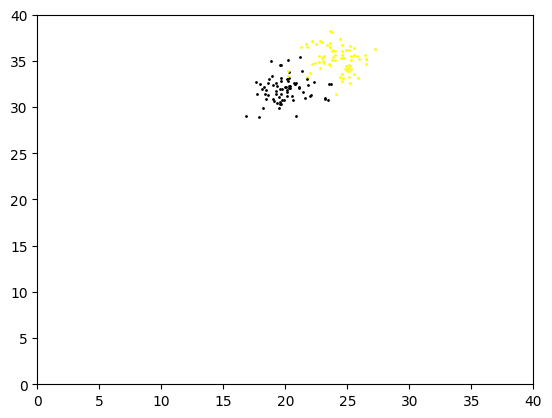

Sample with (25.0, 32.0) classified as Pikachu
Sample with (24.2, 31.5) classified as Pikachu
Sample with (22.0, 34.0) classified as Pikachu
Sample with (20.5, 34.0) classified as Pichu
You entered 22 -22, which does not contain two separate positive numbers.
Please enter two valid positive numbers separated by a space.
That is one giant Pikachu you've got there, buddy! Want to trade my Butterfree for it?
User sample (34.0, 500000.0) classified as Pikachu


In [10]:
import re
import matplotlib.pyplot as plt
import numpy as np

datapoints_path = "./datapoints.txt"  
testpoints_path = "./testpoints.txt"  

cleaned_data = []
test_points = []

list_of_pikachus = []
list_of_pichus = []

with open(datapoints_path, "r") as f_read:
    for line in f_read:
        line = line.strip() 
        line = re.sub(r"[()]", "", line)
       
    #   This divides each line into parts to isolate each variable. It also cleans up each part then adds them to an array of parts.
        parts = [part.strip() for part in line.split(",")]
        
        # This checks if each line has 3 parts, and if it does, sorts them into the correct part-type.
        if len(parts) == 3:
            width, height, label = parts
            # The code below adds the parts to the cleaned_data list as as dictionary with floats or ints depending on what fits best. 
            # It also labels each of the parts in the dictionary as key/value pairs so that we can more easily reference them later on.
            try:
                cleaned_data.append({
                    "width": float(width),  
                    "height": float(height),  
                    "label": int(label) 
                })
            except ValueError:
                # If there is anything wrong with any of the values we attempt to catch it here and stop it from being added to the cleaned data
                print(f"This line has one or more values that are faulty: {line}")  

# Adding this comment as a reminder to myself - 
# to refer to a specific value in a dictionary you can type "dictionary['key']" like so to find it  
# for data_point in cleaned_data:
#    print(f"Width: {data_point['width']}, Height: {data_point['height']}, Label: {data_point['label']}")

plt.axis((0, 40, 0, 40))    

for data_point in cleaned_data:
    if(data_point['label'] == 1):
        list_of_pikachus.append({
                    "width": data_point['width'],  
                    "height": data_point['height'],  
                })
        plt.scatter(data_point['width'], data_point['height'], color='yellow', label='Pikachu', s=1)
    else:     
        list_of_pichus.append({
                    "width": data_point['width'],  
                    "height": data_point['height'],  
                })
        plt.scatter(data_point['width'], data_point['height'], color='black', label='Pichu', s=1)

plt.show()
        


with open(testpoints_path, "r") as f_read:
    for line in f_read:
        line = line.strip()
        # The regex is meant to remove the first number and period from the test points.
        # It starts at the beginning, then checks for one or more digits, then finds the period and any whitespace after it.
        # It then removes or substitues these with nothing so that we are left with the width and height values only.
        line = re.sub(r"^\d+\.\s*", "", line)
        line = re.sub(r"[()]", "", line)
        if ", " in line:
            try:
                x, y = line.split(", ")
                test_points.append((float(x), float(y)))
            except ValueError:
                print(f"This line has one or more values that are faulty: {line}")  


def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


def find_closest_pokemon(x, y):
    # The float('inf') line below is very useful here - it sets the closest_distance variable to infinite.
    # Since any finite number will always be lower than infinity, we don't have to set a specific starting value for
    # closest_distance, which in our case allows the user to enter positive numbers of any size.
    # This also means that the hypothetical Pikachu's of our project can be galaxy-sized, which is funny.

    closest_distance = float('inf')
    closest_pokemon = ""
    
    for pikachu in list_of_pikachus:
        distance = euclidean_distance(x, y, pikachu['width'], pikachu['height'])
        if distance < closest_distance:
            closest_distance = distance
            closest_pokemon = "Pikachu"

    for pichu in list_of_pichus:
        distance = euclidean_distance(x, y, pichu['width'], pichu['height'])
        if distance < closest_distance:
            closest_distance = distance
            closest_pokemon = "Pichu"
    if(closest_distance > 100):
        print("That is one giant Pikachu you've got there, buddy! Want to trade my Butterfree for it?")

    return closest_pokemon


for test_point in test_points:
    x, y = test_point
    classification = find_closest_pokemon(x, y)
    print(f"Sample with ({x}, {y}) classified as {classification}")


while True: 
    try:
        user_input = input("Please enter width and height with positive numbers: ")
        user_x, user_y = map(float, user_input.split())
        
        if user_x <= 0 or user_y <= 0:
            raise ValueError("Please enter positive numbers.")
        
        classification = find_closest_pokemon(user_x, user_y)
        print(f"User sample ({user_x}, {user_y}) classified as {classification}")
        break   
    except ValueError:
        print(f"You entered {user_input}, which does not contain two separate positive numbers.")
        print("Please enter two valid positive numbers separated by a space.")
    


    

    
      

    
        

